In [3]:
import fastbook
fastbook.setup_book()

In [4]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [36]:
time = torch.arange(0,20).float() 
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

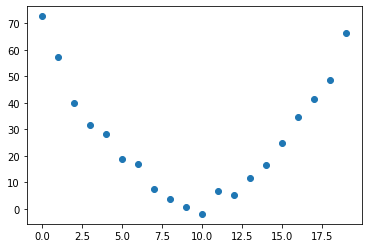

In [37]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [38]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c


In [39]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [40]:
params = torch.randn(3).requires_grad_()
preds = f(time, params)

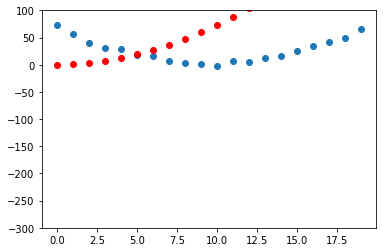

In [41]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)
show_preds(preds)

In [42]:
loss = mse(preds, speed)
loss

tensor(10187.9268, grad_fn=<MeanBackward0>)

In [43]:
loss.backward()
params.grad

tensor([32728.7188,  2100.9204,   124.9925])

In [44]:
params.grad * 1e-5

tensor([0.3273, 0.0210, 0.0012])

In [45]:
params

tensor([ 0.6863,  0.4679, -0.2049], requires_grad=True)

In [46]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None



In [47]:
preds = f(time,params)
mse(preds, speed)

tensor(2470.4714, grad_fn=<MeanBackward0>)

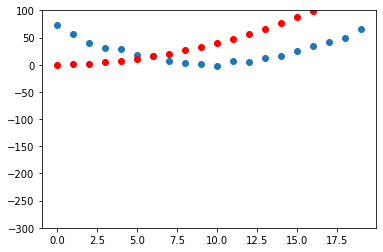

In [48]:
show_preds(preds)


In [49]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [50]:
for i in range(10): apply_step(params)

2470.471435546875
1010.0901489257812
733.7384033203125
681.4413452148438
671.5423583984375
669.666259765625
669.3082885742188
669.2379150390625
669.2215576171875
669.2156372070312


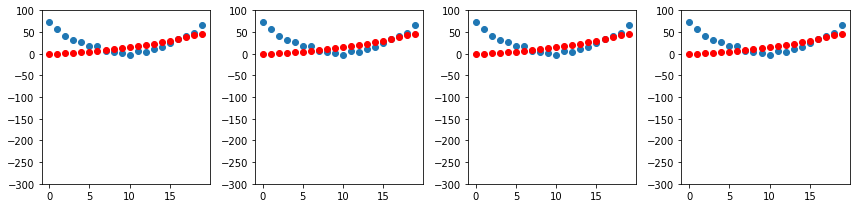

In [51]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [1]:
inputs = [1, 2, 3, 4, 5, 6, 7, 8, 9]
[i*2 for i in inputs if i%2!=0]

[2, 6, 10, 14, 18]

In [5]:
path = untar_data(URLs.MNIST_SAMPLE)

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [7]:
threes

(#6131) [Path('C:/Users/harsi/.fastai/data/mnist_sample/train/3/10.png'),Path('C:/Users/harsi/.fastai/data/mnist_sample/train/3/10000.png'),Path('C:/Users/harsi/.fastai/data/mnist_sample/train/3/10011.png'),Path('C:/Users/harsi/.fastai/data/mnist_sample/train/3/10031.png'),Path('C:/Users/harsi/.fastai/data/mnist_sample/train/3/10034.png'),Path('C:/Users/harsi/.fastai/data/mnist_sample/train/3/10042.png'),Path('C:/Users/harsi/.fastai/data/mnist_sample/train/3/10052.png'),Path('C:/Users/harsi/.fastai/data/mnist_sample/train/3/1007.png'),Path('C:/Users/harsi/.fastai/data/mnist_sample/train/3/10074.png'),Path('C:/Users/harsi/.fastai/data/mnist_sample/train/3/10091.png')...]

In [8]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [12]:
tensor(im3)[4:15,4:22]


tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0],
        [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0,   0,   0],
        [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0,   0,   0],
        [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0,   0,   0],
        [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2,   0,   0],


In [11]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


 18-layer model

In [13]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,0.148948,0.039150,0.994603,03:01


In [31]:
path = untar_data(URLs.MNIST)

In [32]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('testing'),Path('training')]

In [33]:
block = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        batch_tfms=aug_transforms(mult=2., do_flip=False))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\harsi\Anaconda3\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


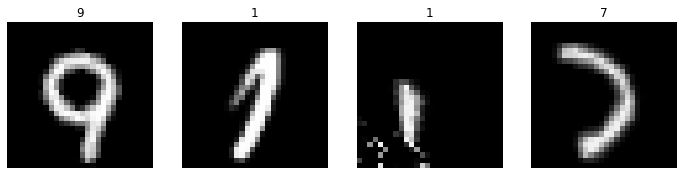

In [34]:
loaders = block.dataloaders(path/"training")
loaders.train.show_batch(max_n=4, nrows=1)

In [35]:
learn = cnn_learner(loaders, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\harsi/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0030199517495930195)

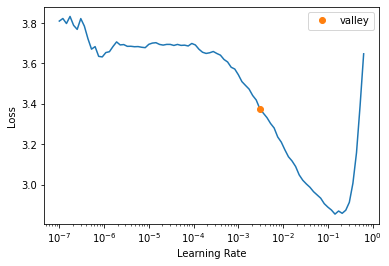

In [36]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.680012,0.274042,0.912667,07:55


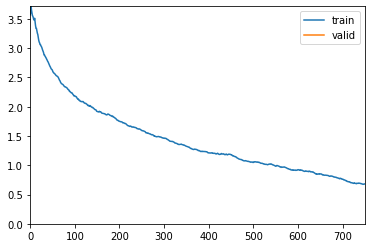

epoch,train_loss,valid_loss,accuracy,time
0,0.193567,0.109769,0.966833,17:57
1,0.153766,0.048690,0.985583,18:44
2,0.155332,0.047489,0.985417,22:22


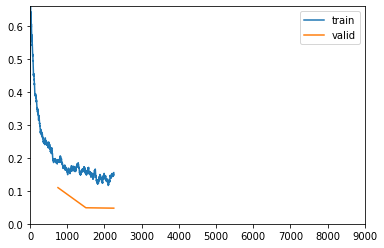

KeyboardInterrupt: 

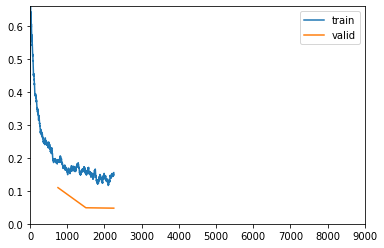

In [37]:
learn.fine_tune(12, base_lr=1e-2, cbs=[ShowGraphCallback()])

In [ ]:
learn.export()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(10)

In [ ]:
learn = load_learner()

In [ ]:
test_dl = learn.dls.test_dl(get_image_files(path/"testing"), with_labels=True)

In [ ]:
fastai_loss, fastai_accuracy = learn.validate(dl=test_dl)

In [ ]:
print_loss_acc(fastai_loss, fastai_accuracy)